# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

## Author : Devdatta Gandole

## Task 1 : Prediction Using Supervised ML

### In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and the target value is the percentage score. This can be solved using simple linear regression.

## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset from remote url

In [4]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

## Exploring Dataset

In [5]:
#Checking shape of the dataset
print(dataset.shape)
dataset.head(10)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#Describing dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Information about dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


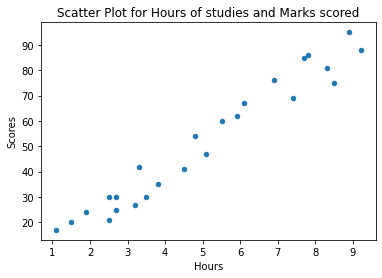

In [29]:
#Plotting the Scatter Plot
dataset.plot(kind='scatter', x='Hours', y='Scores');
plt.title("Scatter Plot for Hours of studies and Marks scored")
plt.show()

In [10]:
#Finding the correlation coefficient
dataset.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
dataset.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [13]:
hours = dataset['Hours']
scores = dataset['Scores']

c:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


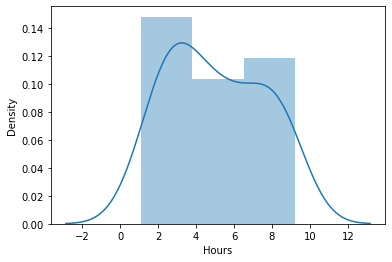

In [14]:
#Plotting the distribution plot for variables
sns.distplot(hours)

c:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


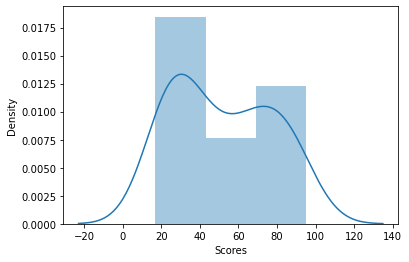

In [17]:
sns.distplot(scores)

## Simple Linear Regression

### Model Building

In [18]:
#extracting x and y from dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values

In [19]:
#Splitting x and y into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [20]:
#Create and train linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

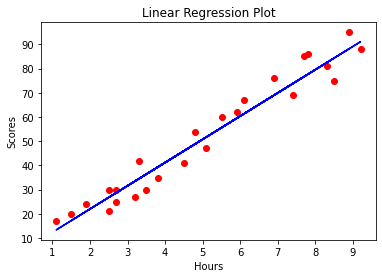

In [21]:
#Finding and Plotting the regression line
m = lr.coef_
c = lr.intercept_
line = m*X+c
plt.scatter(X, y, color='red')
plt.plot(X, line, color='blue')
plt.title('Linear Regression Plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [23]:
#predicting values and comparing with the actual values
y_pred = lr.predict(X_test)
actual_pred = pd.DataFrame({'Actual' :y_test, 'Predicted' :y_pred})
actual_pred['Error'] = actual_pred['Actual']-actual_pred['Predicted']
actual_pred

,Actual,Predicted,Error
0,95,88.211394,6.788606
1,30,28.718453,1.281547
2,76,69.020122,6.979878
3,35,39.273652,-4.273652
4,17,13.365436,3.634564


## Problem Statement : 
## What would be the predicted score if a student studies for 9.25 hours/day?

In [24]:
hr = 9.25
sc = lr.predict([[hr]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(hr,sc))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam.


## Model Evaluation

In [27]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print('R-Squared :',r2_score(y_test,y_pred))

Mean Absolute Error : 4.5916495300630285
R-Squared : 0.971014141329942


## Conclusion :
## The model predicts with R_squared value of 0.97
## For a student who studies 9.25 hours/day the model predicts his/her score to be 91.56%